<a href="https://colab.research.google.com/github/J-Di/Exoplanet-Detection-Model/blob/main/Beyond_Light.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **BEYOND LIGHT**: An Analysis of an Extrasolar Star System

By James Di Sciullo and Mika Lam-Lussier


# **INTRODUCTION**


As our search to find life beyond earth continues, one of the places where life can emerge is on other planets outside of our solar system, these planets are called Extrasolar Planets or Exoplanets. As technology and detection techniques continue to develop, more exoplanets are being discovered every year. One of the techniques that is used to identify the presence of exoplanets around a star is called the radial velocity method, where the periodic shift in a star's radial velocity may suggest the presence of an orbiting planet. When a planet orbits a star, both the star and the planet feel the attractive force of gravity that each body exerts on eachother, leading them to orbit a common center of gravity. Since a star is typically more massive than a planet, the star's movements due to this force will be much less significant compared to that of the planet, which will experience a much greater movement as it has a much smaller mass compared to the star. However, with precise instruments, the difference in radial velocity of the star due to the presence of a planet can be determined.

In cases where there are multiple planets orbiting the same star, the difference in radial velocity of a star is the cumulative effect of all of the exoplanets orbiting the star. Therefore, to isolate each individual planets’ effect on the star, the observed radial velocity of a star must be broken down into multiple curves, each representing the change in the star's radial velocity due to one of the orbiting planets. This is done using the Fourier transform.


In general terms, the fourier transform is the decomposition of a function into the sinusoidal waves that compose it. It has been proven that any function can be split up into a certain set of sine and cosine waves. To accomplish this, there are complex mathematical functions used. However, programming languages such as python have libraries containing developed functions that automatically output the result of the transform if given the input data. In the context of stars and their exoplanets, the oscillations of the stars' total radial velocity fluctuations can be modeled as a set of sine waves. As such, if the radial velocity can be fourier transformed, the sine waves that compose the total radial velocity can be obtained and will correspond to different exoplanets. Finally, the amplitude and frequency of the isolated radial velocity curves can be used to gather more information on the exoplanet itself, such as its period of rotation and establish limits on its mass. Since the observed difference of the star is due to radial velocity, and the stay may experience movements tangentially, without knowing the inclination angle of the star system, only a lower limit of the mass can be determined for each exoplanet.






In our case, we are analyzing the differential radial velocity of the star HD 69830 in our galaxy, which has the presence of 3 Neptune-like exoplanets forming an extrasolar planetary system. In this project we determine if it is possible to establish a lower limit on the masses of exoplanets orbiting a star with non-uniform data, given the radial velocity of the star and the periods of revolution of the respective exoplanets.

# **Models and Numerical Methods**

The imports for our code are pandas to create data frames from our values, math to use basic math functions, numpy to manipulate arrays of values as well as to access their fourier transform functions and matplotlib to visualize our results. **(Appendix A.1)**


Before the sinusoidal waves associated with each exoplanet can be separated, the data for this process needs to be identified and cleaned up. To identify the presence of exoplanets based on the radial velocity of a star, we found a scientific peer-reviewed paper which presents this radial velocity as well as the time at which it was measured. Along with it, a graph plotting out the trend of the points presented was also shown. Using only the points that were present in the paper, it becomes extremely difficult to recreate the graph that was plotted out and leads to having imprecise results. To prevent this issue we used https://automeris.io/WebPlotDigitizer/ in order to create data points from the graph itself. Enough data points were selected to recreate the graph in its entirety. **(Appendix A.1)**


Afterwards, we cleaned up the data by removing the selected data points that didn’t fit the curve provided by the paper directly from the original data set. This needed to be done since the process of selecting the data points is tedious and very prone to human error. For example, on occasions there were two data points for the exact same point in time which causes problems for future data manipulations. In the end, 344 data points were used for the project. The radial velocity and time columns in the pandas dataframe are then converted to numpy arrays in preparation for the fourier transform.**(Appendix A.2)**


To plot out the sinusoidal waves associated with each exoplanet, the amplitudes, or radial velocities, and frequencies associated with each wave need to be obtained. To acquire the amplitude, the fast fourier transform(fft) is applied to the array of radial velocity values. The result is the amplitudes before normalization as a function of a default amount of samples. In other words, it takes the length of the amplitude array and either crops it to the default length of the x axis or adds zeros until it reaches this default length. This is done to obtain the values for the y axis. For the values on the x-axis, a different formula, the frequency fourier transform(fftfreq) is used. This one takes the length of the values used for the y axis as well as the interval of time between the points to output the values of the frequency **(Appendix B.2)**. Since the data used does not have a fixed interval between them, the mean difference between values was calculated and used instead as an approximation **(Appendix B.1)**. Finally, the data from the fast Fourier transform (fft) is set as the y axis and the data from the frequency Fourier transform (fftfreq) is set as the x axis **(Appendix B.2)**. An effective verification used for the fast Fourier transform(fft) is using the inverse fast Fourier transform(ifft) and making sure the same initial radial velocity as a function of time graph is obtained. **(Appendix B.5)**


The graph obtained now shows a function mirrored around the y-axis at y=0 where half the values of frequency are negative and the other half are positive. Since frequency of real objects cannot be negative, the data is formatted to only retain the positive half. This can be verified by plotting the graph and making sure there are no negative values of frequency. **(Appendix B.3)**



At this point, the data isn’t yet normalized; the values from the x axis haven’t been adjusted to the number of data points provided and thus doesn’t correspond to the amplitudes that are desired. To normalize the values, the absolute value of the values on the y-axis is divided by half the number of data points on the x-axis. This new data set now becomes the new y-axis as a function of the frequency. After this normalization, the shape of the graph should stay the exact same; the only difference should be the values on the y-axis. **(Appendix B.4)**


The resulting graph theoretically gives clear and distinct peaks which correspond to the amplitudes and frequencies of the sinusoidal waves associated with each exoplanet. However, due to sources of error both from the fact that we use imprecise real world data and the imprecise methods used in the project, the peaks are ambiguous. As a result, the specific peaks were found using the data on the exoplanets provided on the scientific paper. The paper gives the predicted periods for the three exoplanets that orbit around that star that can then be transformed to frequencies. With this frequency, the corresponding amplitudes can be found based on the data of the Fourier transform. To obtain an approximation of the corresponding amplitude, the average of the amplitude values with x-values between a certain arbitrary frequency range is calculated. For example, one of the frequencies was 0.115, so the average of the amplitudes between 0.110 and 0.120 was calculated. The range chosen was not the same to find all three amplitudes since the orders of magnitude of the three corresponding frequencies are not the same. To make sure the method of calculating the average was correct, the values in those ranges were also manually printed and their averages computed. **(Appendix C.1)**

A class Sine_wave is then created where the amplitude and frequency can be inputted to recreate the desired wave. This class takes in the maximum time(T_Max), the amplitude(A = amplitude) and frequency (f = frequency) and returns the amplitude (y_values) along with the time (t). For all three data points of the exoplanets, the waves are simulated over a period of 100 days which is enough to represent at least half a period of every wave while avoiding condensing of the waves caused by too high time ranges. To validate the efficacy of this class, a basic sine wave of amplitude and frequency of 1 was plotted over a max time(T_MAX) of 10. As expected, it has a max peak of ±1 and goes through 10 periods. **(Appendix C.2)** **(Appendix C.3)** **(Appendix C.4)** **(Appendix C.5)**  **(Appendix C.6)**

For the sake of future validation, the corresponding values of the three sine waves are added up to reform a singular sine wave. To do this, the data for every wave is turned into arrays which can then be added up to one another efficiently. To verify that this code works, the basic sine wave created earlier is added up to itself three times. As expected, it now has an amplitude of 3 and still goes through 10 periods. **(Appendix C.8)** **(Appendix C.9)**

A function to calculate the mass of the exoplanet is then created (calculate_mass), which inputs the frequency and the max radial velocity, the max amplitude and outputs the mass. In the function, the frequency is transformed into the period in seconds, the gravitational constant(G) is defined and the K constant is calculate according the the formula:              

K=$\frac{{4\pi^2}}{{G}} $         


With this, the mass is calculated according to the formula:


$\frac{{m_2^2}}{{(m_1 + m_2)^2}} \sin^3(i) = \frac{{KP}}{{(2\pi)^3}} v_{r_1 \text{max}}^3$




Where $m_2$ is the mass of the exoplanet, $m_1$ is the mass of the star, K is a constant, P is the period of revolution, i is the inclination angle (in this case we assume it is 90 for a edge view) and $ v_{r_1 \text{max}}$ is the maximum radial velocity of the star due to $m_2$.   **(Appendix D.1)**

As a point of comparison, the expected lower limit of the mass was used  directly from the scientific paper. Finally, the percent error is used in order to calculate the percent error between the results obtained in this project and the ones from the scientific paper according to the following formula:

% error = $\frac{theoretical-experimental}{theoretical}*100$         **(Appendix D.3)**


# **Validation**

To validate the code used, comparisons are constantly made between the results from this project and the ones obtained in the scientific paper. In this paper, the sedparated sine waves graph showing radial velocity as a function of orbital phase for the three exoplanets are provided along with their periods. Compared to the ones obtained in the results of this project, they have very similar shapes and amplitudes. To simplify the comparison, the three sine waves computed in this project were plotted in the same graph. All three waves have periods that match very well with the ones in **section**. For example, the first wave has a short period of 8.67 days, which is represented in **section** as approximately 11 periods within the time frame of 100 days, which makes sense considering the number of periods should come out to 100/8.67 = 11.53. On the other hand, the amplitudes obtained roughly line up with the ones in the original data, but still have some differences. For instance, this project’s first wave has an radial velocity, or amplitude, of approximately 2, whereas the paper shows a radial velocity of around 4. Even though the values don’t exactly match, the range of all three of them is between 2 and 4 which gives validity to the results obtained. It is probable that this error is caused by one of the multiple sources of error that affect this project. **(Appendix C.7)**


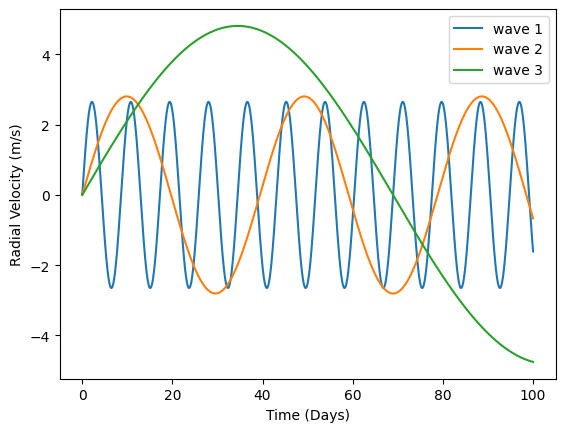

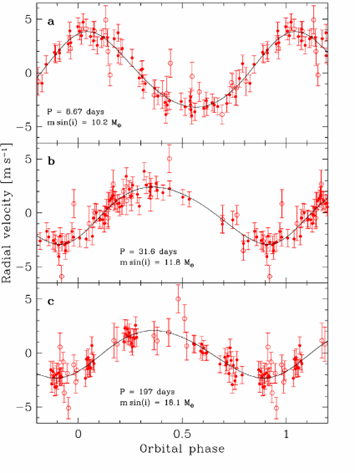

Second, the paper also provides a graph of the three waves combined. Once again, the general shape and range between the results obtained and the original data is very similar, but there are obvious differences. In both graphs, the peaks are at around ±8 radial velocity for the same range of 100 days. On the other hand, all the peaks within the graph occur at different places than in the paper. This is because the Sine_wave class used for the reconstruction of the combined wave graph didn't take into account a potential phase shift. Therefore, different values were added up together when the graph composing all three waves is reformed. As a whole, the general shape and the range of values being correct still support the ideas that the methods used are effective, albeit flawed. **(Appendix C.9)**


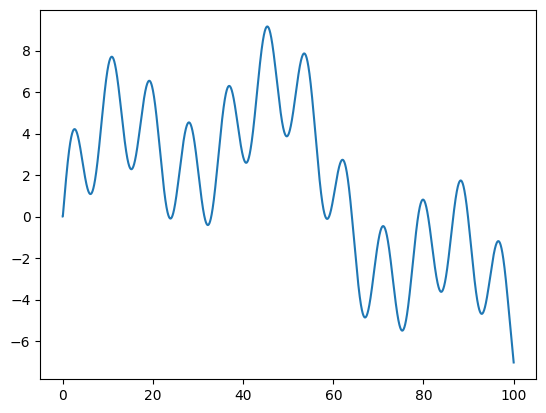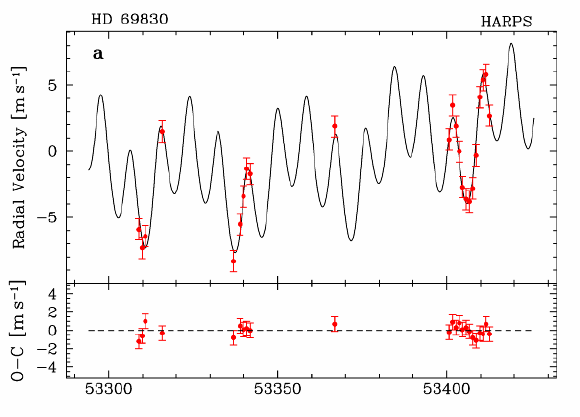

Lastly, the final result of the lower-limit mass of each exo-planet can be compared to those shown by the scientific research. This is done using the percent error function coded. The percent error for the first exoplanet is 42.25%, 116.1% for the second and 266.91% for the third. Even though these percent errors are large, they still indicate that the results were in the same general order of magnitude. Considering the massive size of these exo-planets, this once again shows that the methods used are most likely effective, but have multiple sources of error. **(Appendix D.3)**


# **Results**

To visualize the cumulative effect of the exoplanets pulling on their star, the data of HD 69830’s radial velocity was plotted as a function of time. The dots correspond to the selected data points on the graph used for this project. **(Appendix A.2)**


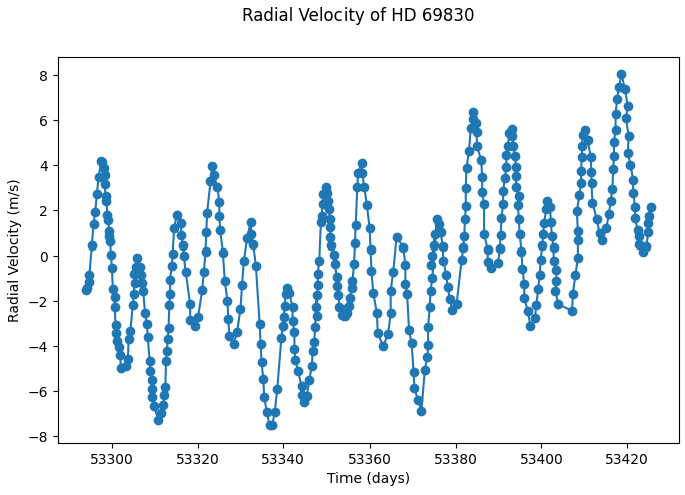

Fig. 1: Radial Velocity of star HD 69830 due to the precense of 3 exoplanets as a function of time.

The fast fourier transform was performed on the data, as well as a normalization of the result, followed by disregarding the negative portion of it. This final state after the Fourier transform is composed of numerous peaks, each theoretically indicating the presence of a wave, denoted by the amplitude along with the frequency of the wave. However, the three expected peaks are not clear; a lot of other data is present and creates the illusion that there are more than three peaks. **(Appendix B.4)**


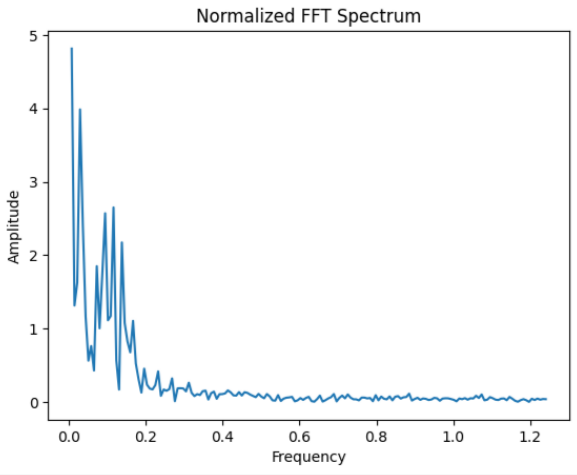

Fig. 2: Normalized fast fourier transform of the radial velocity data after removal of negative frequency and normalization.

To verify the results from the fft, an inverse fourier transform (ifft) was conducted on the fft result to reconstruct the original data. This new graph looks exactly like the graph of the original data and validates that the fast Fourier transform (fft) was well applied.

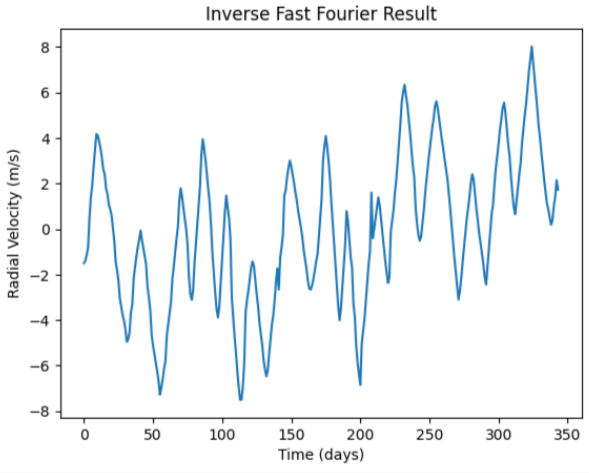

Fig. 3: Inverse fast fourier transform of fft data to reconstruct the original dataset.

The frequencies obtained from the fast Fourier transform (fft) that matched with those of the 3 exoplanets were then isolated, along with their respective amplitudes, and individual sine waves were created for each frequency. Each sine wave reveals HD 69830’s motion due to each of the exoplanets respectively **(Appendix C.3)** **(Appendix C.4)** **(Appendix C.5)**.

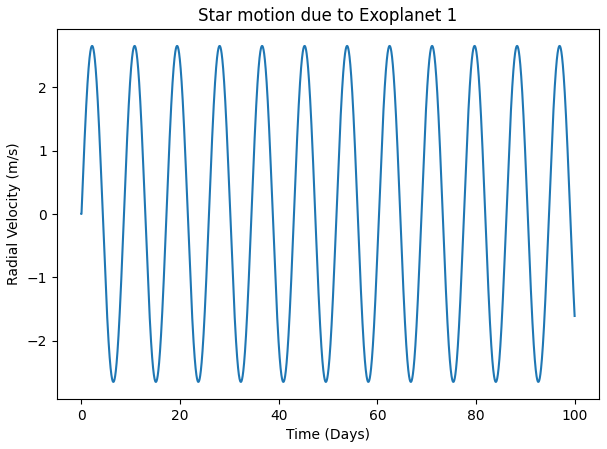

Fig. 4: Radial Velocity of HD 69830 due to the first orbiting exoplanet.

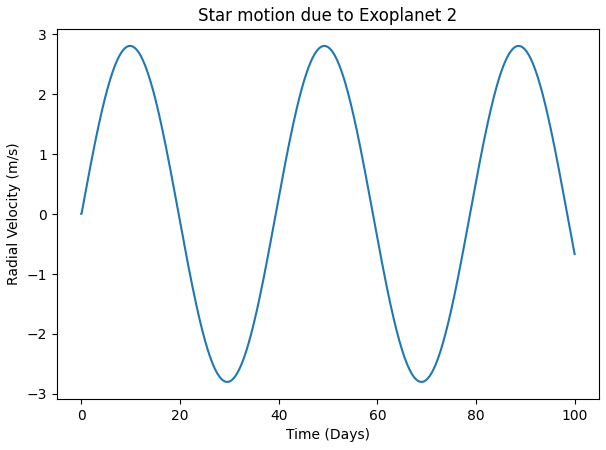

Fig. 5: Radial Velocity of HD 69830 due to the second orbiting exoplanet.

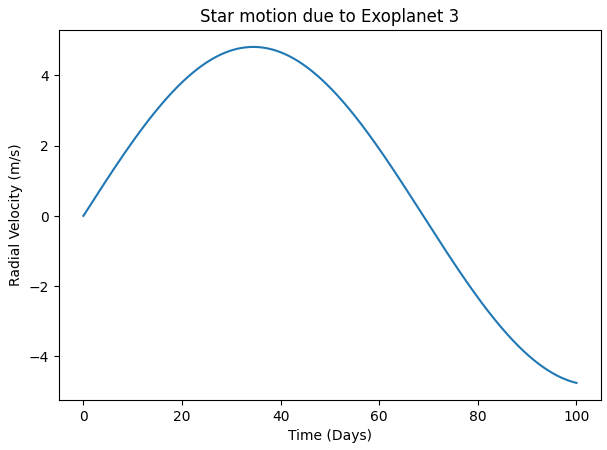

Fig. 6: Radial Velocity of HD 69830 due to the third orbiting exoplanet.

The experimentally determined values for the masses of the three exoplanets are calculated to be 14.5 Me (Earth masses) for the first exoplanet, 25.5 Me for the second exoplanet, and 66.4 Me for the third exoplanet (see Appendix D).

# **Discussion**

The experimentally determined values for the masses of the three exoplanets were calculated based on the frequency and amplitudes from the fft. The resultant effects of each of these planets on HD 69820 is illustrated in Fig. 4, 5 and 6 respectively, demonstrating to what extent each individual planet affected the stars movements. For the first Exoplanet, the theoretical mass is 10.2Me (Earth masses) and the experimentally determined mass is 14.5, leaving a percent error of 42.25%. For the second exoplanet, the theoretical mass is 11.8 Me, and the experimental mass is 25.5, with a 116.1% error. Lastly, the third exoplanet has a theoretical mass of 18.1Me, and the experimentally determined mass is 66.4 Me, with a percent error of 266.9%.


After applying the fast Fourier transform (fft), although there are many peaks present in Fig. 2, each one of them is not very precise or clear. This is because instead of each peak being associated with a single frequency and amplitude value, many of the peaks span over more than a single frequency value. As a result, the frequency and respective amplitude values that would theoretically be very precise lose their accuracy, and are instead replaced with a range of possible frequency and amplitude values. This phenomenon is also present at the end of Fig. 2, where values that should otherwise remain constant as 0 are replaced with small ranges of frequencies and amplitudes. The inverse fast Fourier transform (ifft) in Fig. 3 comfirms the successfull fast fourier transform that was performed on the data as it was able to reconstruct the orginal data from Fig. 1 that the fourier trasnform was conducted on.

There are many sources of error that could have contributed to the large percent errors that are present in the lower limits of mass. Firstly, there can be errors found in the assumptions that were made to perform the fft. Since the data points were not uniform, that is they were not taken at even intervals from each other, the fft was performed using the average time interval between the data points. This could have altered the precision of the fft seen as the interval between data points did not perfectly coincide with the interval the fft was using. There is also a source of error in how the data points were collected. These points were collected from a pre-existing graph with the use of a digital tool (https://automeris.io/WebPlotDigitizer/). As a result, the accuracy of the graph is limited to the precision of the website, and to what accuracy the points are able to be selected. Another source of error is present in how the desired frequencies describing each of the exoplanets were isolated. For this experiment, an arbitrary range was considered such that one or two values fit the range, where an average of these values were then calculated. However, due to the inconsistency in the frequencies returned from the fft and the different orders of magnitude of the desired frequencies, it became impossible to use ranges of equal size to determine the three desired frequencies. For example, the exoplanet with the lowest frequency of 0.00507 would require a different range of frequencies to appropriately take an average than the exoplanet with the highest frequency of 0.115. As a result, three different ranges of accepted frequencies were considered. This can greatly change the result as it has a direct impact on the periods and amplitudes considered for the calculation of the mass of the exoplanets, and the creation of the sine waves of their respective influence on the star.


One of the ways to improve this method for future projects is to fit the initial data from the cumulative radial velocity of the scientific paper with a curve to ensure that the data is uniform to provide a more accurate fft. This could be accomplished through a linear regression line between each one of the points, and select points along each regression line could be chosen to ensure that the distance between each data point is the same. With evenly spaced data that is perfectly positioned on the curve, it is very likely that the peaks after the Fourier transform would become much clearer. Thus, there would be no need to reverse engineer the amplitudes desired based on the frequencies given in the paper. This model could also be improved with more implementations of optimization functions. For instance, optimization functions can be incorporated to find the optimal phase shift value for each of the separated sine waves such that the best possible recreation of the experimental data points is formed. A possible way of doing this could be to take a few points in the original graph before it is Fourier transformed. Then it could be stated that the sum of corresponding points of the three separated sin waves need to add up to the values of that point. The optimisation algorithm could then go through the possible phase shifts to find the ones that make the waves add up and contain the observed points.


# **Conclusion**

In conclusion, the objective of this project was accomplished as we were able to establish a lower limit on the masses of exoplanets orbiting a star. Based on the star’s radial velocity, a fast fourier transform was conducted, which was used to isolate the experimental periods of revolution of the exoplanets around their star. By using these periods of revolution, along with their respective amplitudes, sine graphs were created representing the motion of the star due to each planet separately, and these waves were also used to reconstruct the initial dataset using experimental values. These periods and amplitudes were also used to later calculate a lower limit on the mass of the exoplanets, which was later compared to the theoretical values.

#**References**

Alkousa, Omar. “Fourier Transform, the Practical Python Implementation.” Medium, 13 Mar. 2023, towardsdatascience.com/
fourier-transform-the-practical-python-implementation-acdd32f1b96a.

Kong, Qingkai, et al. “Fast Fourier Transform (FFT) — Python Numerical Methods.” Python Programming And Numerical Methods: A Guide For Engineers And Scientists, pythonnumericalmethods.berkeley.edu/notebooks/chapter24.03-Fast-Fourier-Transform.html.

Lovis, Christophe, et al. “An Extrasolar Planetary System with Three Neptune-Mass Planets.” ResearchGate, June 2006, www.researchgate.net/publication/7072137_An_extrasolar_planetary_system_with_three_Neptune-mass_planets.

MacLeod, Cameron. “Fourier Transforms with Scipy.Fft: Python Signal Processing.” Real Python, 1 Sept. 2022, realpython.com/python-scipy-fft/.

NumPy. “Numpy.Fft.Fft#.” Numpy.Fft.Fft - NumPy v1.24 Manual, numpy.org/doc/stable/reference/generated/numpy.fft.fft.html.

Nunez-Iglesias, Juan, et al. “Elegant Scipy.” O’Reilly Online Learning, www.oreilly.com/library/view/elegant-scipy/9781491922927/ch04.html.

PYTHONTIC. “Applying Fourier Transform in Python Using Numpy.Fft.” Applying Fourier Transform in Python Using Numpy.Fft | Pythontic.Com, 2023, pythontic.com/visualization/signals/fouriertransform_fft.

Rohatgi, Ankit. “WebPlotDigitizer.” WebPlotDigitizer - Extract Data from Plots, Images, and Maps, 16 Sept. 2022, automeris.io/WebPlotDigitizer/.

# **APPENDIX A**

**A.1**

In [ ]:
#Imports

#Sources:
# https://numpy.org/doc/stable/reference/generated/numpy.fft.fft.html
# https://pythontic.com/visualization/signals/fouriertransform_fft
# https://pythonnumericalmethods.berkeley.edu/notebooks/chapter24.04-FFT-in-Python.html
# https://www.oreilly.com/library/view/elegant-scipy/9781491922927/ch04.html

import pandas as pd
import math
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt

#link to data
#from: https://www.researchgate.net/publication/7072137_An_extrasolar_planetary_system_with_three_Neptune-mass_planets#pf11'

path_to_data2= "https://docs.google.com/spreadsheets/d/1Vysc68egyMNNcBGLWxt5HgPVjJfG9N178WIp0CfUaxM/export?format=csv"

df2=pd.read_csv(path_to_data2)
df2

,Time,Radial Velocity
0,53293.96,-1.498150
1,53294.16,-1.395160
2,53294.56,-1.137630
3,53294.76,-0.828460
4,53295.34,0.459905
...,...,...
339,53424.49,0.393332
340,53424.88,1.011687
341,53424.87,1.424062
342,53425.46,2.145406


**A.2**

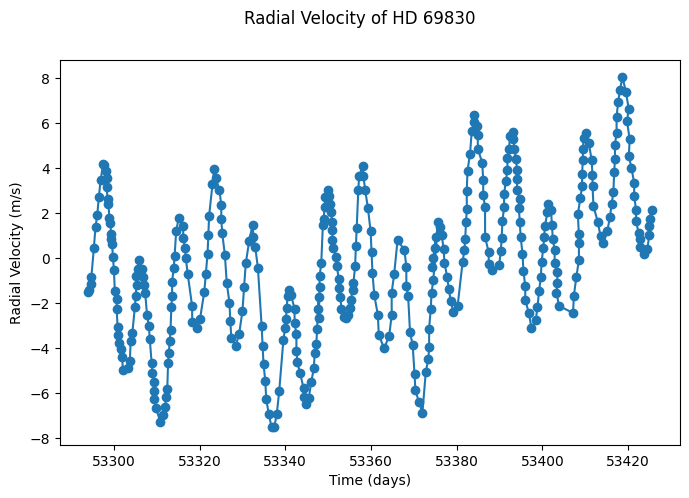

In [ ]:
#Visualization of the data

fig, ax = plt.subplots()
fig.suptitle('Radial Velocity of HD 69830')
ax.plot(df2["Time"], df2['Radial Velocity'])
ax.scatter(df2["Time"], df2['Radial Velocity'])
ax.set(xlabel='Time (days)', ylabel='Radial Velocity (m/s)')
fig.set_figheight(5)
fig.set_figwidth(8)
plt.show()

**A.3**

In [ ]:
#Cleaning up the data

df2=df2.dropna(subset=["Radial Velocity"])
amplitude = df2["Radial Velocity"].to_numpy()
x_value_array=df2["Time"].to_numpy()

print(len(amplitude))
print(max(amplitude))
print(min(amplitude))

344
8.0252
-7.49992


# **Appendix B**

**B.1**

In [ ]:
#This function is to take a list of all of the time intervals between the data points, to find the average time interval between data points (used by fft)

time_interval=[] #list to store the time intervals between each time point from the dataset
sum=0

for i in range(1, len(x_value_array)):
  time_interval.append(abs(x_value_array[i]- x_value_array[i-1]))
for j in range(len(time_interval)):
  sum+=time_interval[j]

average_t_interval=  sum/len(time_interval)
print(f"the average time interval between sata points is {round(average_t_interval,3)}")

the average time interval between sata points is 0.401


**B.2**

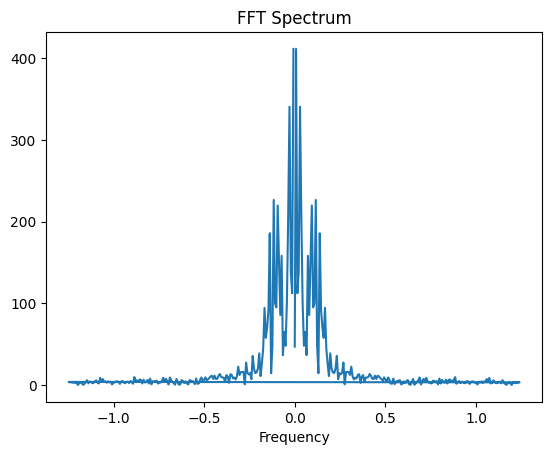

In [ ]:
#Preforming the fft

fft_result = np.fft.fft(amplitude)
time_interval = average_t_interval  # Assuming the time intervals are uniform, taken from the average previously calculated
frequencies = np.fft.fftfreq(len(amplitude), d=time_interval)

plt.plot(frequencies, np.abs(fft_result))
plt.xlabel('Frequency')
plt.title('FFT Spectrum')
plt.show()

**B.3**

411.5384182154137


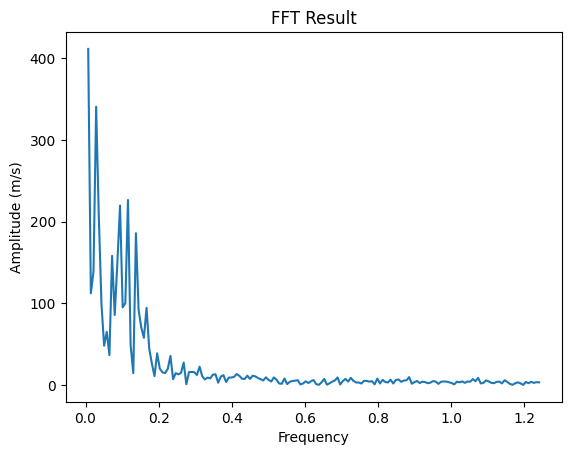

In [ ]:
#Getting rid of the false side of the frequencies

frequencies_sorted=[]
amplitudes_sorted=[]

for i in range(len(frequencies)):
  if frequencies[i] >0:
    frequencies_sorted.append(frequencies[i])
    amplitudes_sorted.append(np.abs(fft_result[i]))

print(max(amplitudes_sorted))

plt.plot(frequencies_sorted, amplitudes_sorted)
plt.xlabel('Frequency')
plt.ylabel('Amplitude (m/s)')
plt.title('FFT Result')
plt.show()

**B.4**

171


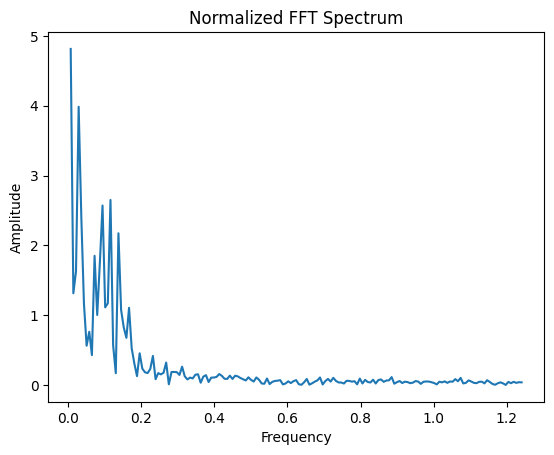

In [ ]:
# Normalizes the result of the fft

# Calculate N/2 to normalize the FFT output
N = len(amplitudes_sorted)
print(N)
normalize = N/2
amplitudes_sorted_new = np.abs(amplitudes_sorted)/normalize

# Plot the normalized FFT (|Xk|)/(N/2)


plt.plot(frequencies_sorted, amplitudes_sorted_new)
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('Normalized FFT Spectrum')
plt.show()

**B.5**

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


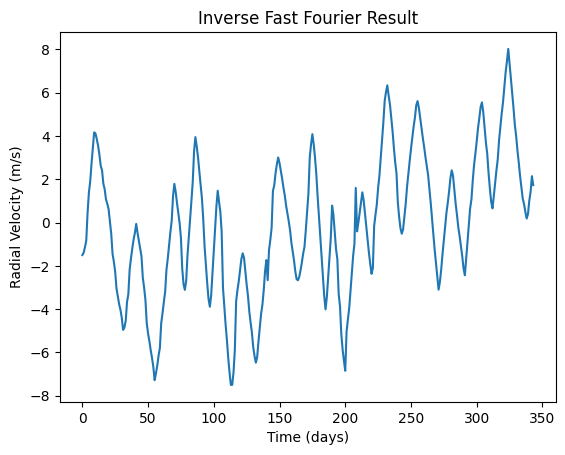

In [ ]:
#performs the inverse fft, to reconstruct the initial dataset and validate the fft

fourier_test4 = np.fft.ifft(fft_result)
plt.plot(fourier_test4)
plt.xlabel('Time (days)')
plt.ylabel('Radial Velocity (m/s)')
plt.title('Inverse Fast Fourier Result')
plt.show()
plt.show()

# **APPENDIX C**

**C.1**

In [ ]:
#Here the desired frequencies will be isolated:

# PLANET 1
#period is 8.67, so frequency is 1/8.67 =0.115 from data

planet1={} #dictionary of the exoplanet 1 data
amps=[] #list of amplitudes to calculate average
fre=[] #list of frequencies to calculate average

for i in range(len(amplitudes_sorted_new)):
  if frequencies_sorted[i] > 0.11 and frequencies_sorted[i] < 0.12: #these are values that are around the true value, to give a range
    amps.append(amplitudes_sorted_new[i])
    fre.append(frequencies_sorted[i])

#this part is to find the average of any of the values that were added inside the acceptable range
sum=0
for i in range(len(amps)):
  sum+=amps[i]
planet1["amplitude"]=sum/len(amps)
sum=0
for i in range(len(fre)):
  sum+=fre[i]
planet1["frequency"]= sum/len(fre)

print(amps)
print(fre)

#Planet 2
# period is 31.6 days, so frequency is 1/36.6=0.0273 from data

planet2={} #dictionary of the exoplanet 2 data
amps=[] #list of amplitudes to calculate average
fre=[] #list of frequencies to calculate average

for i in range(len(amplitudes_sorted_new)):
  if frequencies_sorted[i] > 0.020 and frequencies_sorted[i] < 0.03:#these are values that are around the true value, to give a range
    amps.append(amplitudes_sorted_new[i])
    fre.append(frequencies_sorted[i])

#this part is to find the average of any of the values that were added inside the acceptable range
sum=0
for i in range(len(amps)):
  sum+=amps[i]
planet2["amplitude"]=sum/len(amps)
sum=0
for i in range(len(fre)):
  sum+=fre[i]
planet2["frequency"]= sum/len(fre)

print(amps)
print(fre)

#Planet 3
#period is 197 days, so frequency is 1/197 = 0.00507 from data

planet3={}#dictionary of the exoplanet 3 data
amps=[] #list of amplitudes to calculate average
fre=[] #list of frequencies to calculate average

for i in range(len(amplitudes_sorted_new)):
  if frequencies_sorted[i] > 0.001 and frequencies_sorted[i] < 0.01:#these are values that are around the true value, to give a range
    amps.append(amplitudes_sorted_new[i])
    fre.append(frequencies_sorted[i])

#this part is to find the average of any of the values that were added inside the acceptable range
sum=0
for i in range(len(amps)):
  sum+=amps[i]
planet3["amplitude"]=sum/len(amps)
sum=0

for i in range(len(fre)):
  sum+=fre[i]

planet3["frequency"]= sum/len(fre)

print(amps)
print(fre)

[2.6498890134241657]
[0.11605069012943106]
[1.6269308071110828, 3.9852137372972107]
[0.021759504399268326, 0.029012672532357765]
[4.813314832928815]
[0.007253168133089441]


In [ ]:
#Accessing the list of dictionnaries

print(f"Planet1: \n Has an amplitude of {planet1['amplitude']}\n A frequency of {planet1['frequency']}")
print(f"Planet2: \n Has an amplitude of {planet2['amplitude']}\n A frequency of {planet2['frequency']}")
print(f"Planet3: \n Has an amplitude of {planet3['amplitude']}\n A frequency of {planet3['frequency']}")


Planet1: 
 Has an amplitude of 2.6498890134241657
 A frequency of 0.11605069012943106
Planet2: 
 Has an amplitude of 2.8060722722041467
 A frequency of 0.025386088465813045
Planet3: 
 Has an amplitude of 4.813314832928815
 A frequency of 0.007253168133089441


**C.2**


In [ ]:
# Here is a class that creates sin waves based on imputted frequency and Amplitude, as well as time period (since planets have various periods)

class Sine_wave():

  DT=0.01

  def __init__(self,T_MAX, amplitude, frequency):
    self.T_MAX=100
    self.STEPS=T_MAX/self.DT
    self.A=amplitude
    self.f=frequency
    self.t=[0,]
    self.y_values=[0,]

  def update_time(self):
      for i in range(int(self.STEPS)):
        self.t.append(self.t[i]+self.DT)

  def create_wave(self, STEPS, A, f,t):
    for i in range(int(self.STEPS)):
      self.y_values.append(self.A*math.sin((2*math.pi*self.f)*(self.t[i])))

  def simulate (self):
    self.update_time()
    self.create_wave(self.STEPS,self.A,self.f,self.t)
    return self.y_values, self.t

**C.3**


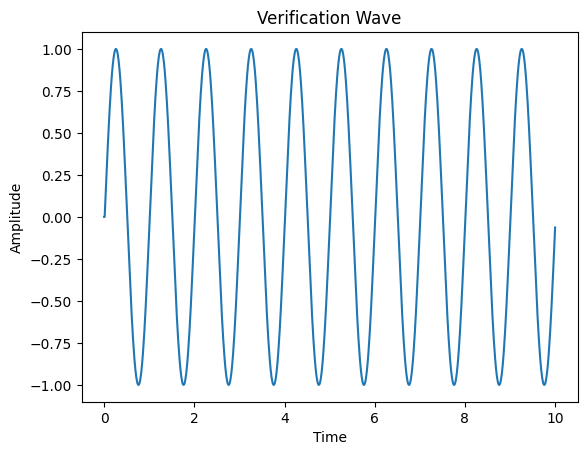

In [ ]:
#Basic sine wave verification
wave0=Sine_wave(10,1,1)
wave0.simulate()

fig, ax = plt.subplots()
plt.plot(wave0.t,wave0.y_values)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Verification Wave')

plt.show()

C.4

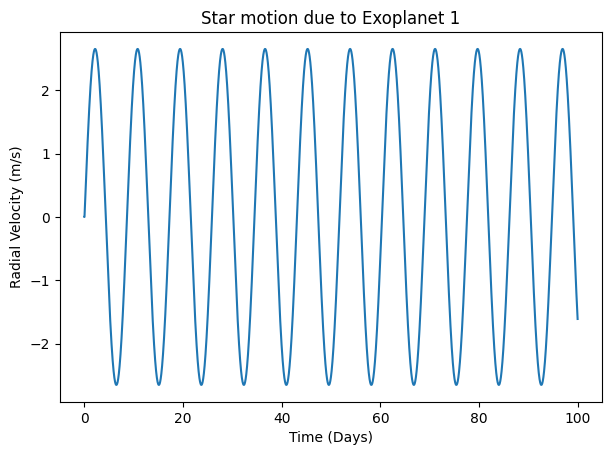

In [ ]:
#Planet 1's effect on the sun
wave1=Sine_wave(100,planet1["amplitude"],planet1["frequency"])
wave1.simulate()

fig, ax = plt.subplots()
plt.plot(wave1.t,wave1.y_values)
plt.xlabel('Time (Days)')
plt.ylabel('Radial Velocity (m/s)')
plt.title('Star motion due to Exoplanet 1')

fig.set_figwidth(7)
plt.show()


**C.5**

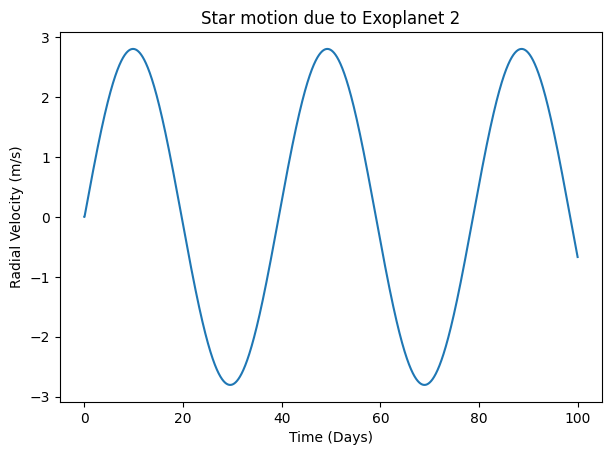

In [ ]:
#Planet 2's effect on the star
wave2=Sine_wave(100,planet2["amplitude"],planet2["frequency"])
wave2.simulate()

fig, ax = plt.subplots()
plt.plot(wave2.t,wave2.y_values)
plt.xlabel('Time (Days)')
plt.ylabel('Radial Velocity (m/s)')
plt.title('Star motion due to Exoplanet 2')
fig.set_figwidth(7)
plt.show()


**C.6**

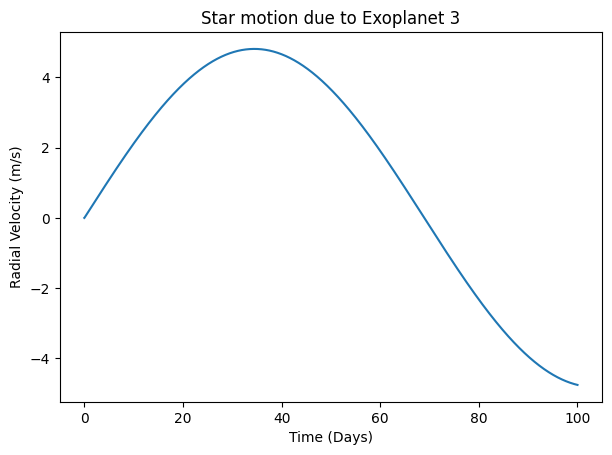

In [ ]:
#Planet 3's effect on the sun

wave3=Sine_wave(100,planet3["amplitude"],planet3["frequency"])
wave3.simulate()

fig, ax = plt.subplots()
plt.plot(wave3.t,wave3.y_values)
plt.xlabel('Time (Days)')
plt.ylabel('Radial Velocity (m/s)')
plt.title('Star motion due to Exoplanet 3')
fig.set_figwidth(7)
plt.show()


**C.7**

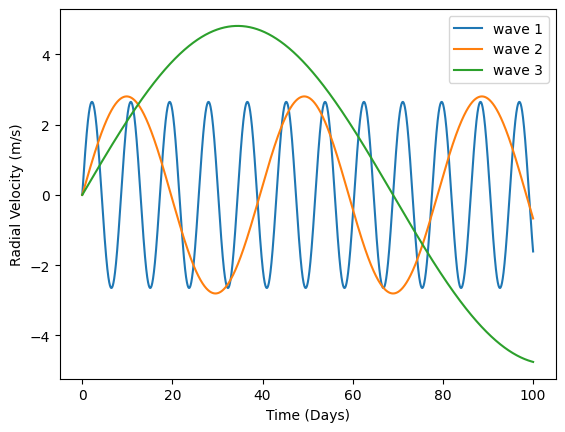

In [ ]:
#Here is a plot to visualize the cumulative wave that will be calculated to reconstruct the original dataset using experimental data

plt.plot(wave1.t,wave1.y_values, label = "wave 1")
plt.plot(wave2.t,wave2.y_values, label = "wave 2")
plt.plot(wave3.t,wave3.y_values, label = "wave 3")
plt.xlabel('Time (Days)')
plt.ylabel('Radial Velocity (m/s)')
plt.legend()

plt.show()

**C.8**

<function matplotlib.pyplot.show(close=None, block=None)>

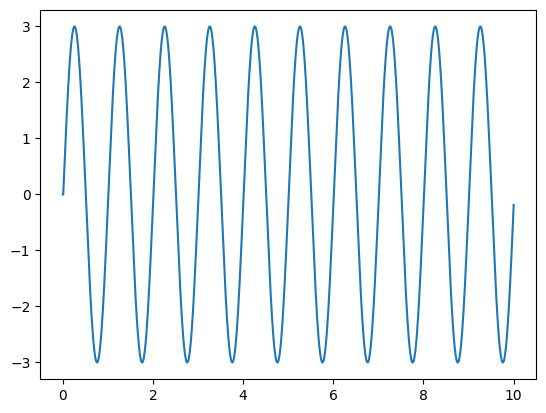

In [ ]:
# Adds three times the basic sine wave as verification

wave0_y1 = np.array(wave0.y_values)
wave0_y2 = np.array(wave0.y_values)
wave0_y3 = np.array(wave0.y_values)

y_value1 = np.add(wave0_y1, wave0_y2)
y_value2 = np.add(y_value1, wave0_y3)

plt.plot(wave0.t, y_value2)
plt.plot()
plt.show

**C.9**

<function matplotlib.pyplot.show(close=None, block=None)>

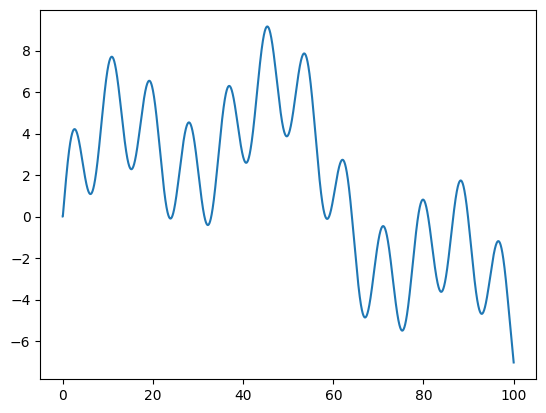

In [ ]:
# Adds the corresponding y values of each sine wave to recreate teh original dataset based on experimental data

wave1_y = np.array(wave1.y_values)
wave2_y = np.array(wave2.y_values)
wave3_y = np.array(wave3.y_values)

y_value1 = np.add(wave1_y, wave2_y)
y_value2 = np.add(y_value1, wave3_y)

plt.plot(wave1.t, y_value2)
plt.plot()
plt.show



# **APPENDIX D**

**D.1**

In [ ]:

#Creates a function to calculate mass of the exoplanet
#from theory, we know that the HD 69830 system has a star with a mass of 0.89 Ms (solar masses)
#http://exoplanet.eu/catalog/HD%2069830%20b/


def calculate_mass(frequency, radial_velocity_max):

  #Here the period is in seconds, the mass in Kg, and radial velocity in m/s

  period= (1/frequency)*24*3600
  G=6.674*10**(-11) #this is the gravitational constant
  K=(4*math.pi**2)/G #this is a constant
  mass_star= 0.89*1.989*10**(30) #from theory, we know the mass is 0.89 Ms
  observable= K*(period/((2*math.pi)**2))*radial_velocity_max**3

#since "i" is not known (the inclination angle of the system), this will be a lower limit for the masses, so the assumption will be that we have an edge on view of the system so i=90, sin(i)=1

  return ((mass_star**2)*observable)**(1/3) #here there is an assumption made that the mass of the planet is << mass of the star

  print(calculate_mass())


**D.2**

In [ ]:
#Expressing results

print(f"\n Lower limit of mass of the first exo-planet\n {calculate_mass(planet1['frequency'], planet1['amplitude'])} or {round(calculate_mass(planet1['frequency'], planet1['amplitude'])/(5.972*10**24),2)} Earth Masses")
print(f"\n Lower limit of mass of the second exo-planet\n {calculate_mass(planet2['frequency'], planet2['amplitude'])}, or {round(calculate_mass(planet2['frequency'], planet2['amplitude'])/(5.972*10**24),2)} Earth Masses ")
print(f"\n Lower limit of mass of the third exo-planet\n {calculate_mass(planet3['frequency'], planet3['amplitude'])}, or {round(calculate_mass(planet3['frequency'], planet3['amplitude'])/(5.972*10**24),2)} Earth Masses")



 Lower limit of mass of the first exo-planet
 8.664379815721772e+25 or 14.51 Earth Masses

 Lower limit of mass of the second exo-planet
 1.5227407237917659e+26, or 25.5 Earth Masses 

 Lower limit of mass of the third exo-planet
 3.965768823017586e+26, or 66.41 Earth Masses


**D.3**

In [ ]:
#Calculates the percente error between the experimentally determined values for the exoplanets' earth masses and the accepted values.
#From data, theoretical lower limits: (https://www.researchgate.net/publication/7072137_An_extrasolar_planetary_system_with_three_Neptune-mass_planets#pf11)

# Exo Planet 1: 10.2 Me (Earth masses)
# Exo Planet 2: 11.8 Me
# Exo Planet 3: 18.1 Me

#calculating percent differences

def percent_error(theoretical, observed):

  return round(((abs(theoretical-observed))/theoretical)*100,2)

print(f"\n Percent error of lower limit of mass of the first exo-planet\n {percent_error(10.2, round(calculate_mass(planet1['frequency'], planet1['amplitude'])/(5.972*10**24),2))}")
print(f"\n Percent error of lower limit of mass of the second exo-planet\n {percent_error(11.8, round(calculate_mass(planet2['frequency'], planet2['amplitude'])/(5.972*10**24),2))}")
print(f"\n Percent error of lower limit of mass of the third exo-planet\n {percent_error(18.1, round(calculate_mass(planet3['frequency'], planet3['amplitude'])/(5.972*10**24),2))}")





 Percent error of lower limit of mass of the first exo-planet
 42.25

 Percent error of lower limit of mass of the second exo-planet
 116.1

 Percent error of lower limit of mass of the third exo-planet
 266.91
